In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,  plot
from statsmodels.tsa.stattools import adfuller
from pandas import datetime
import numpy as np
import math
import datetime as dt
import time
import bs4 as bs
import re
import pickle
import os
import requests
import matplotlib.ticker as ticker
from matplotlib.dates import date2num, DayLocator, DateFormatter
pd.core.common.is_list_like = pd.api.types.is_list_like
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [55]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

This analysis should contain the following:
    
-Plot the time series, along with any logical or necessary differences to get a stationary dataset
-Generate and interpret a PACF for the time series (and/or its differences)
-Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
-Finally choose one specification and make the case for that as a logical model for your dataset.

In [56]:
atvi = pd.read_csv('ATVI.csv')

In [57]:
atvi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-06-26,0.494792,0.520833,0.489583,0.520833,0.469820,3367600
1,2000-06-27,0.505208,0.526042,0.497392,0.520833,0.469820,1800400
2,2000-06-28,0.522133,0.528642,0.502600,0.505208,0.455726,726600
3,2000-06-29,0.502600,0.502600,0.458333,0.471350,0.425184,3604400
4,2000-06-30,0.471350,0.562500,0.468750,0.541667,0.488613,7435600


In [8]:
atvi.index = pd.to_datetime(atvi.Date)

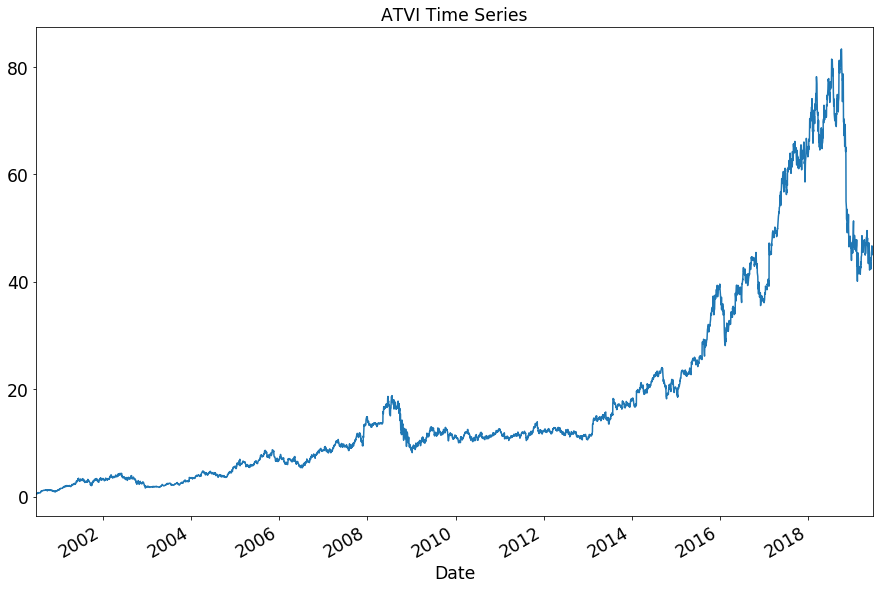

In [9]:
atvi['Close'].plot()
plt.title('ATVI Time Series')
plt.show()

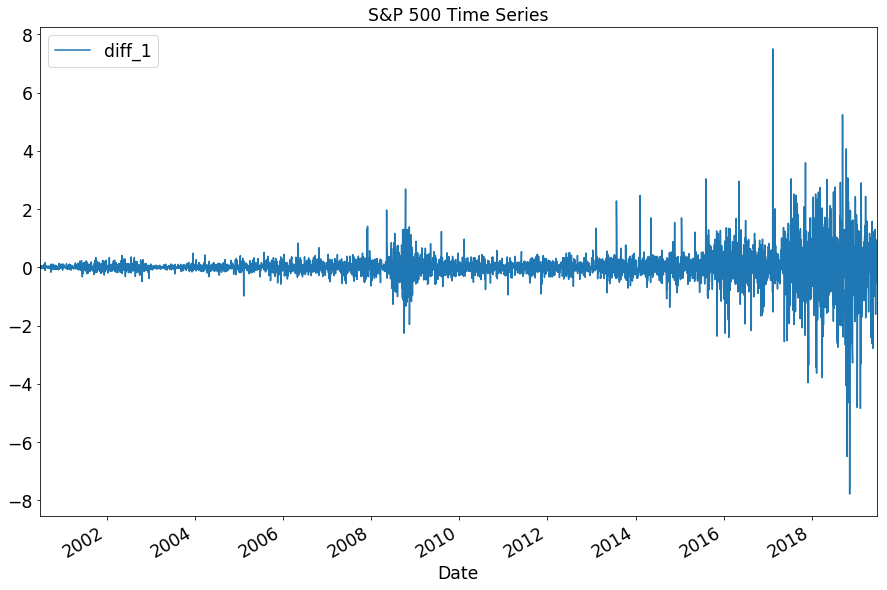

In [27]:
atvi['diff_1'] = atvi['Close'] - atvi['Close'].shift()
atvi.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

Major volatility recently with Activision Blizzard. May make this difficult to analyze.

Text(0.5, 1.0, 'ATVI PACF')

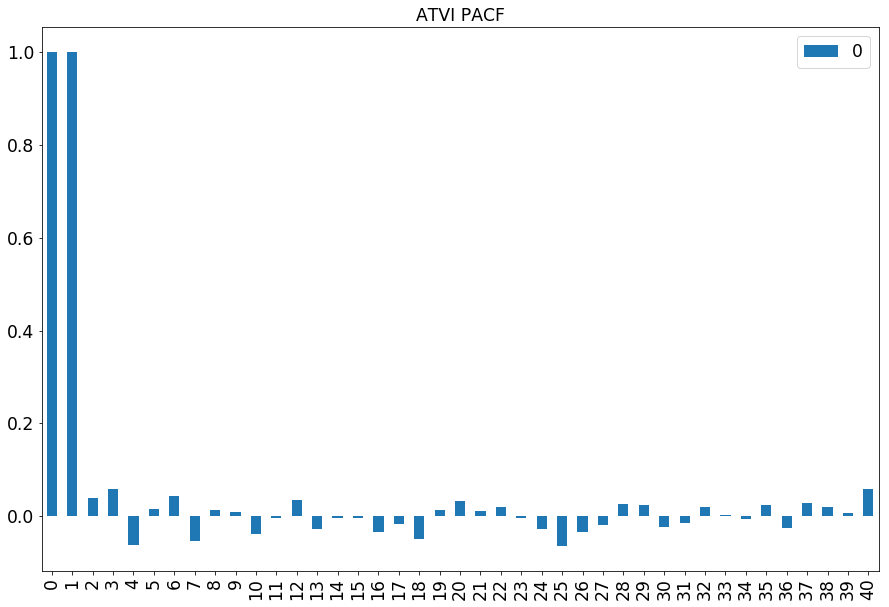

In [10]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(atvi['Close']))
x_acf.plot(kind='bar')
plt.title("ATVI PACF")

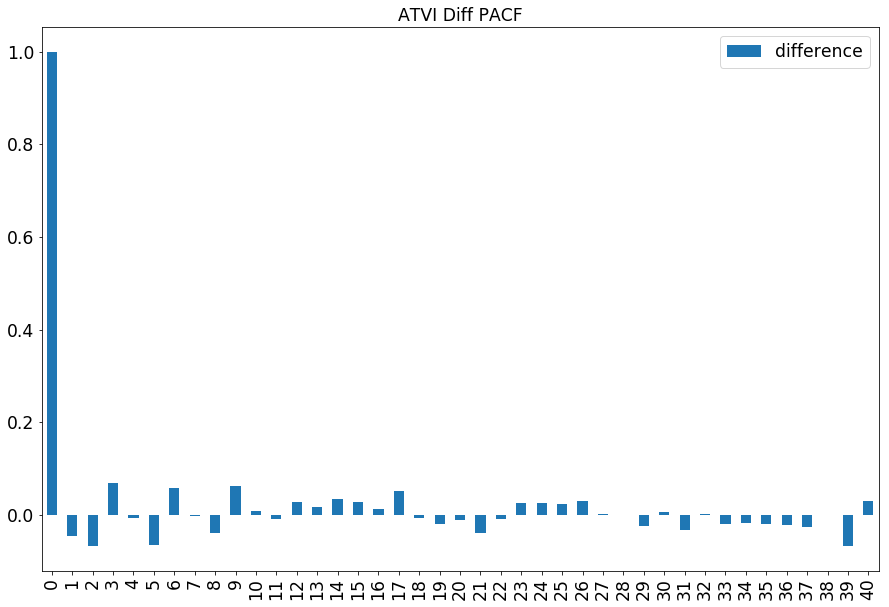

In [29]:
x_acf = pd.DataFrame(pacf(atvi.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("ATVI Diff PACF")
plt.legend(['difference'])

I don't see any strong correlations here for the residuals. Let's try an ARIMA model.

In [11]:
#random walk model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(atvi['Close'], order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

D:\Anaconda\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an 

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4776
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3971.206
Method:                           css   S.D. of innovations              0.556
Date:                Tue, 25 Jun 2019   AIC                           7946.412
Time:                        11:40:45   BIC                           7959.355
Sample:                             1   HQIC                          7950.959
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0095      0.008      1.182      0.237      -0.006       0.025
Residuals Description
count    4.776000e+03
mean     7.517190e-14
std      5.558028e-01
min     -7.789507e+00
25%     -1.195038e-01

In [21]:
#damped-trend linear exponential smoothing model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(atvi['Close'], order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4776
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3951.947
Method:                       css-mle   S.D. of innovations              0.554
Date:                Mon, 24 Jun 2019   AIC                           7913.894
Time:                        14:00:07   BIC                           7946.251
Sample:                             1   HQIC                          7925.261
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0095      0.007      1.307      0.191      -0.005       0.024
ar.L1.D.Close    -0.3691      0.103     -3.569      0.000      -0.572      -0.166
ma.L1.D.Close     0.3252      0.103     

In [22]:
(7946.412-7915.894)/7946.412

0.0038404754246319003

Neither ARIMA models are strongly predictive but of these the damped trend lienar exponential smoothing model works the best. Let's try changing p to 2 or 3:

In [58]:
#damped-trend linear exponential smoothing model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(atvi['Close'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4776
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3919.955
Method:                       css-mle   S.D. of innovations              0.550
Date:                Tue, 25 Jun 2019   AIC                           7851.910
Time:                        14:14:02   BIC                           7890.739
Sample:                             1   HQIC                          7865.551
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0095      0.008      1.253      0.210      -0.005       0.024
ar.L1.D.Close    -0.8159      0.062    -13.155      0.000      -0.937      -0.694
ar.L2.D.Close    -0.7813      0.035    -

In [12]:
#damped-trend linear exponential smoothing model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(atvi['Close'], order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4776
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3916.584
Method:                       css-mle   S.D. of innovations              0.549
Date:                Tue, 25 Jun 2019   AIC                           7847.168
Time:                        11:40:54   BIC                           7892.468
Sample:                             1   HQIC                          7863.082
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0095      0.007      1.289      0.198      -0.005       0.024
ar.L1.D.Close    -1.1048      0.059    -18.607      0.000      -1.221      -0.988
ar.L2.D.Close    -0.9111      0.038    -

Ok we've had modest improvements here. Let's run with this model...let's do a quick split of the data so that we've some independent test data towards the end and let's compare the model results with this:

In [60]:
#split so last 100 days are test data
atvi_train = atvi.iloc[:4677]
atvi_test = atvi.iloc[4677:]

In [71]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(atvi_train['Close'], order=(3,1,2))
model_fit = model.fit()

In [95]:
forecast_next100 = model_fit.forecast(steps=100)

forecast_next100[0]

array([45.6868744 , 45.68454226, 45.79167724, 45.71797988, 45.72373433,
       45.80748782, 45.75081126, 45.76023544, 45.82616436, 45.78314127,
       45.79479029, 45.84709363, 45.81499807, 45.82788683, 45.86979337,
       45.84642274, 45.85989386, 45.89388224, 45.87746212, 45.89108948,
       45.91905925, 45.90816421, 45.9216829 , 45.94508725, 45.93857518,
       45.95183103, 45.97177972, 45.96873777, 45.98165129, 45.9989902 ,
       45.99869045, 46.01123122, 46.02660389, 46.02846716, 46.04063592,
       46.05453094, 46.05809737, 46.0699136 , 46.08270116, 46.08760634,
       46.09909981, 46.11105976, 46.1170155 , 46.12822069, 46.1395641 ,
       46.14634288, 46.15729532, 46.168181  , 46.17560354, 46.18633757,
       46.19688469, 46.20480996, 46.21535748, 46.2256552 , 46.23397245,
       46.24436223, 46.25447707, 46.26309947, 46.27335693, 46.28333836,
       46.29219794, 46.30234517, 46.31222983, 46.32127349, 46.33132945,
       46.34114439, 46.35033069, 46.36031147, 46.37007658, 46.37

In [96]:
forecast = atvi_test
forecast['predicted'] = forecast_next100[0]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



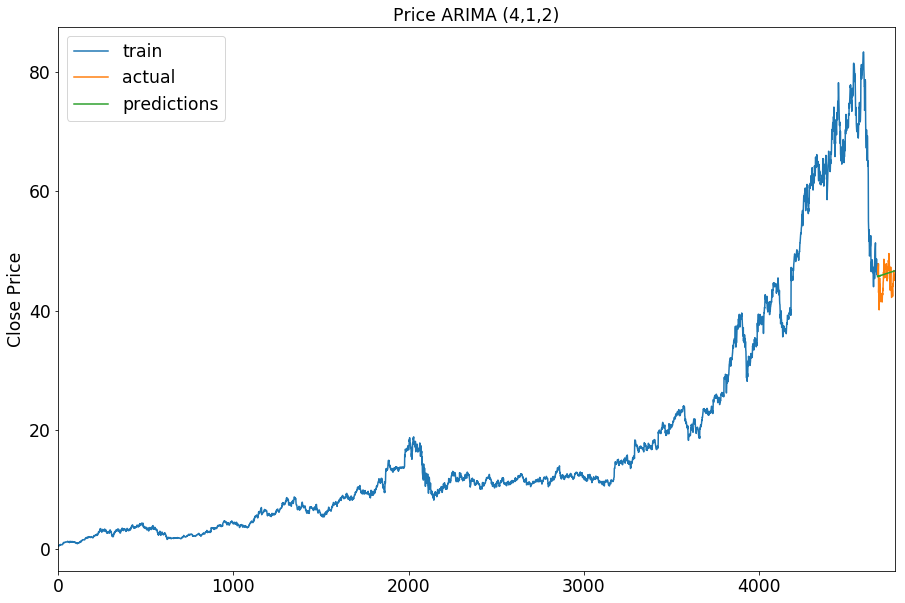

In [97]:
#plot data like this
atvi_train['Close'].plot(label='train')
atvi_test['Close'].plot(label='actual')
forecast['predicted'].plot(label='predictions')
plt.title("Price ARIMA (4,1,2)")
plt.ylabel("Close Price")
plt.legend()
plt.show()

Model doesn't capture volatility, in this context it performs ok. Let's see if it could have predicted the huge drop at the end of 2018 (it won't, but let's make sure)

In [98]:
#split so last 100 days are test data
atvi_train = atvi.iloc[:4577]
atvi_test = atvi.iloc[4577:]

In [99]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(atvi_train['Close'], order=(3,1,2))
model_fit = model.fit()

In [103]:
forecast_next100 = model_fit.forecast(steps=200)

forecast_next100[0]

forecast = atvi_test
forecast['predicted'] = forecast_next100[0]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



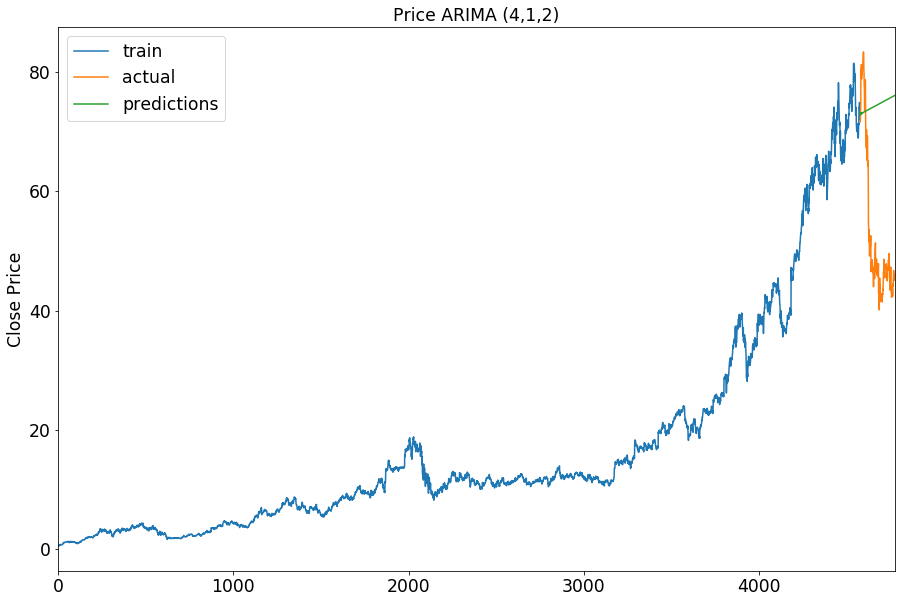

In [104]:
#plot data like this
atvi_train['Close'].plot(label='train')
atvi_test['Close'].plot(label='actual')
forecast['predicted'].plot(label='predictions')
plt.title("Price ARIMA (4,1,2)")
plt.ylabel("Close Price")
plt.legend()
plt.show()

As expected, the model does not predict this.